<a href="https://colab.research.google.com/github/ankit15697/dataset-analysis/blob/master/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [58]:
import matplotlib.pyplot as plt
import numpy as np
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


In [59]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [60]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


From about print statements it is clear that training data contains total 60000 images of pixels 28*28 and test data includes 1000 images
the shape of output is column vector which contains class of image

In [61]:
#converting 28*28 pixels image into one dimensional vector
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [62]:
print (X_train.shape)
print (X_train[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

In [63]:
print (Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
print (Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [64]:
def plot_weights(model):
  w_after = model_sigmoid.get_weights()

  h1_w = w_after[0].flatten().reshape(-1,1)
  h2_w = w_after[2].flatten().reshape(-1,1)
  out_w = w_after[4].flatten().reshape(-1,1)


  fig = plt.figure()
  plt.title("Weight matrices after model trained")
  plt.subplot(1, 3, 1)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=h1_w,color='b')
  plt.xlabel('Hidden Layer 1')

  plt.subplot(1, 3, 2)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=h2_w, color='r')
  plt.xlabel('Hidden Layer 2 ')

  plt.subplot(1, 3, 3)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=out_w,color='y')
  plt.xlabel('Output Layer ')
  plt.show()

In [65]:
def plot_loss(model):
  score = model.evaluate(X_test, Y_test)
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  x = list(range(1,nb_epoch+1))
  ax.set_xlabel('epoch') ;
  ax.set_ylabel('Categorical Crossentropy Loss')
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

<h2>Softmax Classifier </h2>

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [67]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 100
nb_epoch = 15


In [68]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [69]:
model.compile (optimizer = "sgd", loss = "categorical_crossentropy", metrics=['accuracy'])

In [70]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [71]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 223.3817 - accuracy: 0.8327 - val_loss: 136.6898 - val_accuracy: 0.8597
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 143.2918 - accuracy: 0.8665 - val_loss: 137.5810 - val_accuracy: 0.8770
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 144.7076 - accuracy: 0.8706 - val_loss: 153.8295 - val_accuracy: 0.8491
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 138.8821 - accuracy: 0.8731 - val_loss: 133.2728 - val_accuracy: 0.8760
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 137.2086 - accuracy: 0.8758 - val_loss: 110.6583 - val_accuracy: 0.8997
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 126.7232 - accuracy: 0.8795 - val_loss: 149.3989 - val_accuracy: 0.8441
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 124.6908 - accuracy: 0.8778 - val_loss: 91.1481 - 

313/313 [==============================] - 1s 2ms/step - loss: 132.0271 - accuracy: 0.8806
Test score: 132.0270538330078
Test accuracy: 0.8805999755859375


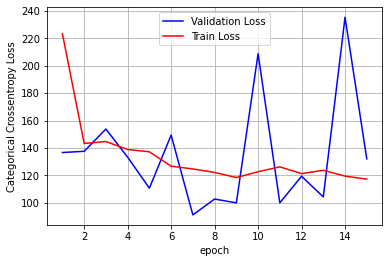

In [72]:
plot_loss(model)

<h2>MLP + Sigmoid activation + SGDOptimizer </h2>

In [73]:
#Multi layer Perceptron 
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_sigmoid.compile (optimizer = "sgd", loss = "categorical_crossentropy", metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4520 - accuracy: 0.7125 - val_loss: 0.9029 - val_accuracy: 0.8463
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.7181 - accuracy: 0.8616 - val_loss: 0.5638 - val_accuracy: 0.8817
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.5025 - accuracy: 0.8891 - val_loss: 0.4327 - val_accuracy: 0.9009
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.9032 - val_loss: 0.3673 - val_accuracy: 0.9109
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.9116 - val_loss: 0.3250 - val_accuracy: 0.9172
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.9191 - val_loss: 0.2997 - val_accuracy: 0.9209
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2860 - accuracy: 0.9248 - val_loss: 0.2768 - val_accuracy: 0.9252
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.1986 - accuracy: 0.9434
Test score: 0.19861027598381042
Test accuracy: 0.9434000253677368


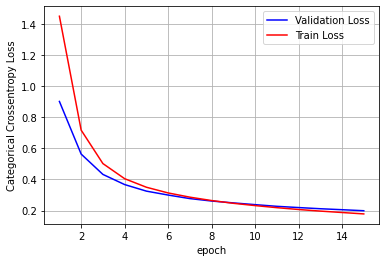

In [75]:
plot_loss(model_sigmoid)

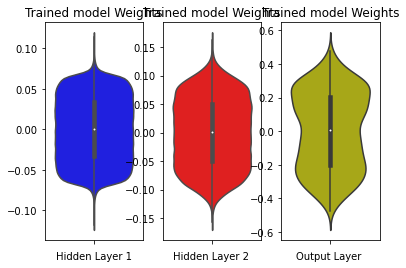

In [76]:
# Weight related info
plot_weights(model_sigmoid)

<h2>MLP + ReLU +SGD </h2>

In [77]:
#Multi layer Perceptron 
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_relu.compile (optimizer = "sgd", loss = "categorical_crossentropy", metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 24824109110244002496512.0000 - accuracy: 0.1107 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 2.5121 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_a

313/313 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1135
Test score: 2.3010079860687256
Test accuracy: 0.11349999904632568


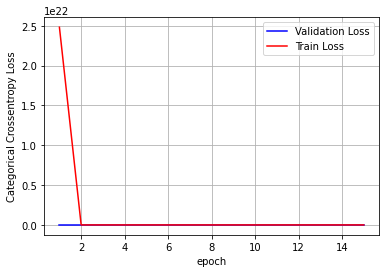

In [79]:
plot_loss(model_relu)

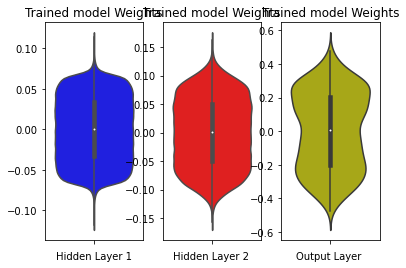

In [80]:
plot_weights(model_relu)

<h2>MLP + ReLU + ADAM</h2>

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 1.7655 - accuracy: 0.8732 - val_loss: 0.3885 - val_accuracy: 0.9171
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.9305 - val_loss: 0.2932 - val_accuracy: 0.9325
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1865 - accur

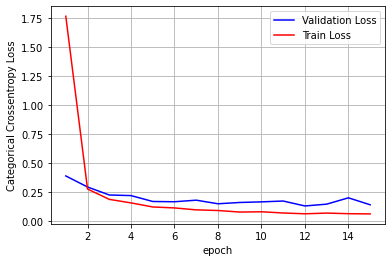

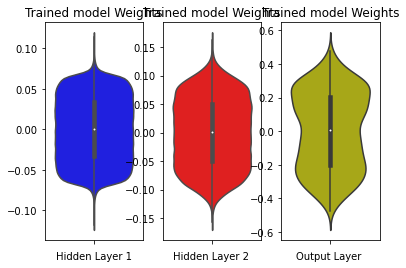

In [81]:
#Multi layer Perceptron 
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

print (model_relu.summary())
model_relu.compile (optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

plot_loss(model_relu)

plot_weights(model_relu)

<h2>MLP + Batch-Norm on hidden Layers + AdamOptimizer</h2>

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
None
Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.5563 - accuracy: 0.8268 - va

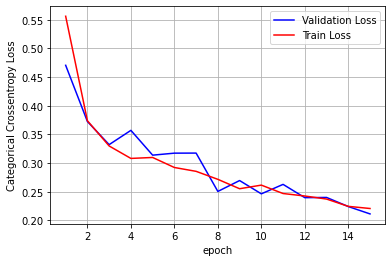

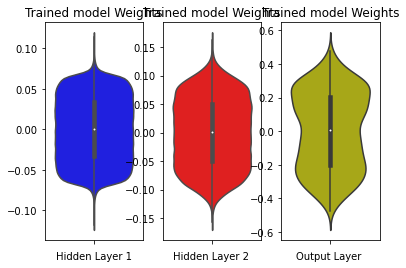

In [82]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


print (model_batch.summary())
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
plot_loss(model_batch)

plot_weights(model_batch)

<h2>MLP + Dropout + AdamOptimizer </h2

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

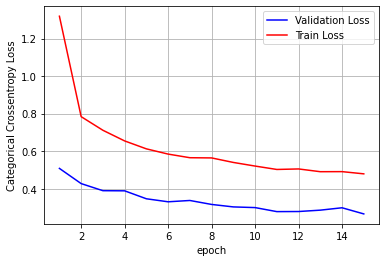

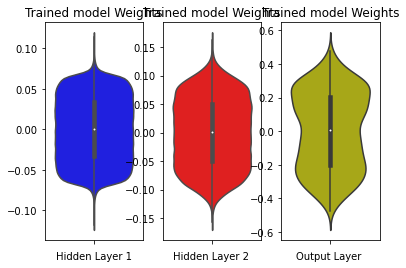

In [83]:
from keras.layers import Dropout

model_dropout = Sequential()

model_dropout.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_dropout.add(BatchNormalization())
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_dropout.add(BatchNormalization())
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(output_dim, activation='softmax'))


print (model_dropout.summary())
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_dropout.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

plot_loss(model_dropout)
plot_weights(model_dropout)